# Exploratory Data Analysis (EDA)

Conduct EDA on the Quora Insincere dataset that is cleaned after performing pre-processing on training and test data set to remove unwanted records, vocabulary, junk content

In [61]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

In [62]:
os.getcwd()

'C:\\Shalin\\Springboard bootcamp\\projects\\Capstone project 2\\Capstone Two'

In [63]:
eda_file_name = 'C:\\Shalin\\Springboard bootcamp\\projects\\Capstone project 2\\Capstone Two\\data\\Quora_cleaned.csv'

In [64]:
df = pd.read_csv(eda_file_name)

In [65]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(10)

,qid,question_stemmed,target,question_length,total_words
0,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,212,32
1,1ef37766a923f24f2182,didnt genghi khan thee great khan abolish dest...,1,209,32
2,4d2e2796dd1ced2c8e64,prospect intern student httpwwwophammainquorac...,0,209,12
3,93b9389889ad4aa8518a,waz genghiz khanz thee great khanz go get libe...,1,207,32
4,313a5512fefd7dbf0fba,safe north east indian assam arunach pradesh m...,0,204,27
5,1d49a0610c8be715e275,much public school teacher salari benefit sout...,0,200,26
6,8727cf4973780583dd19,would arrang follow term act skill alia bhatt ...,0,199,28
7,4a24f6189a1c20915f68,qué carrera estudiar para ser un científico co...,0,197,34
8,2d686cc72efb2b7b5435,relat sport take ibuprofen aspirin acetaminoph...,0,194,28
9,6700a979fa215d451fc3,listen everyon next 911 major nuclear attack h...,1,194,34


In [66]:
#Extract textfields from questions
#raw_questions = []
#for questions in df['question_stemmed']:
#    raw_questions.append(questions)

In [67]:
#raw_questions

In [68]:
#Create a string form of our list of text
#import re


#raw_string = ''.join(raw_questions)
#no_links = re.sub(r'http\S+', '', raw_string)
#no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
#no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [69]:
# No. of values per column
df.count()

qid                 1024881
question_stemmed    1024881
target              1024881
question_length     1024881
total_words         1024881
dtype: int64

In [70]:
# Track Memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024881 entries, 0 to 1024880
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   qid               1024881 non-null  object
 1   question_stemmed  1024881 non-null  object
 2   target            1024881 non-null  int64 
 3   question_length   1024881 non-null  int64 
 4   total_words       1024881 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 193.8 MB


In [71]:
df.dtypes

qid                 object
question_stemmed    object
target               int64
question_length      int64
total_words          int64
dtype: object

### Distributions of Quora data - Sincere vs. Insincere

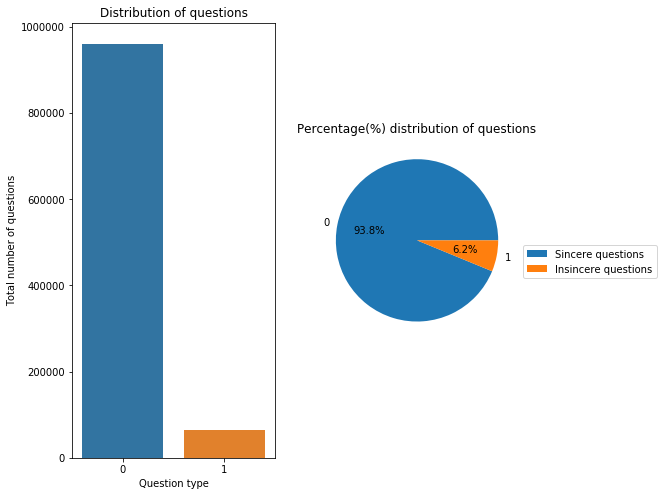

In [72]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,8))

count = df['target'].value_counts()
sns.barplot(count.index, count.values, ax = ax[0])
ax[0].set_title('Distribution of questions')
ax[0].set_xlabel('Question type')
ax[0].set_ylabel('Total number of questions')

percentage = (np.array((count / count.sum())*100))
labels = (np.array(count.index))
pie_chart = plt.pie(percentage,labels=labels,autopct='%1.1f%%')
ax[1].set_title('Percentage(%) distribution of questions')

plt.legend(["Sincere questions","Insincere questions"],loc='bottom', bbox_to_anchor=(1, 0.5))
plt.show()

### Check to see if there is a linear relationship between 'Insincere/ Sincere' question and 'Length of question'

### Box plot to visualize 
- Co-relation of 'Total number of words' on 'length of questions' to be able to discern that that questions are actually long because of the total number of words and not due to junk content
(for both 'sincere' and 'insincere' questions indicated by 0 and 1 respectively)

Text(0, 0.5, 'Question Length')

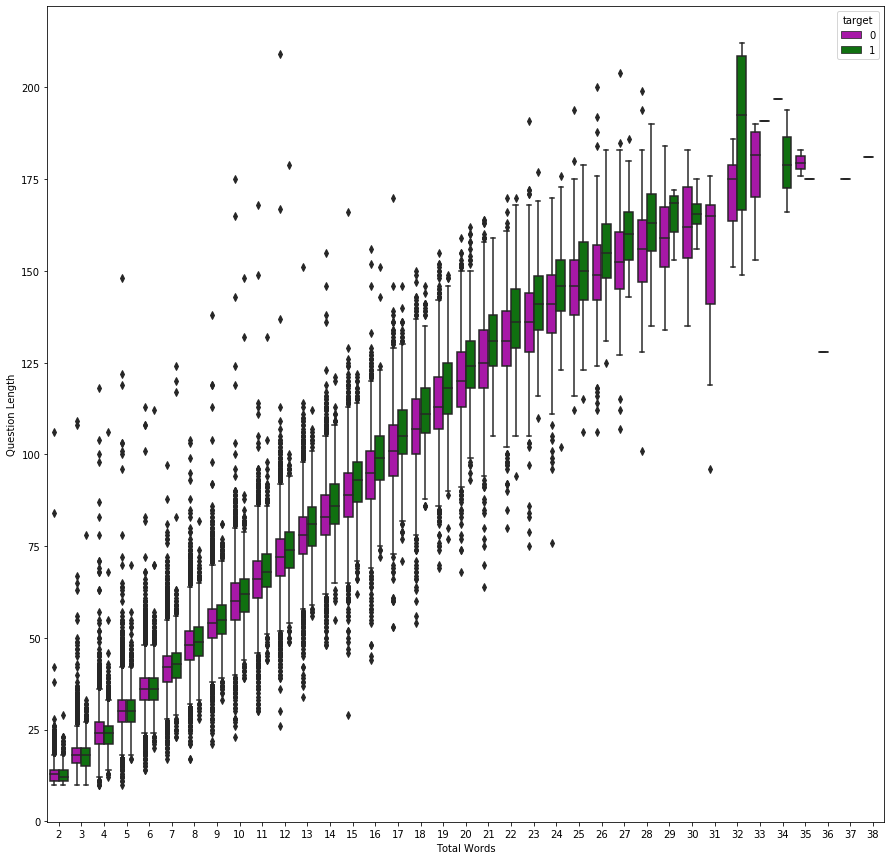

In [73]:
plt.rcParams["figure.figsize"] = (15,15)

ax = sns.boxplot(x="total_words", y="question_length",
            hue="target", palette=["m", "g"],
            data=df)

ax.set_xlabel('Total Words')
ax.set_ylabel('Question Length')

In [74]:
df['question_length'].describe()

count    1.024881e+06
mean     3.965744e+01
std      2.276279e+01
min      1.000000e+01
25%      2.400000e+01
50%      3.400000e+01
75%      4.900000e+01
max      2.120000e+02
Name: question_length, dtype: float64

In [75]:
df['total_words'].describe()

count    1.024881e+06
mean     6.583676e+00
std      3.691689e+00
min      2.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      8.000000e+00
max      3.800000e+01
Name: total_words, dtype: float64

### Generate a violin plot and overlay combined plots
To evaluate the spread of questions across:
- 'Length of questions' grouped horizontally by 'Sincere vs Insincere questions'
- 'Total number of words' grouped horizontally by 'Sincere vs Insincere questions'

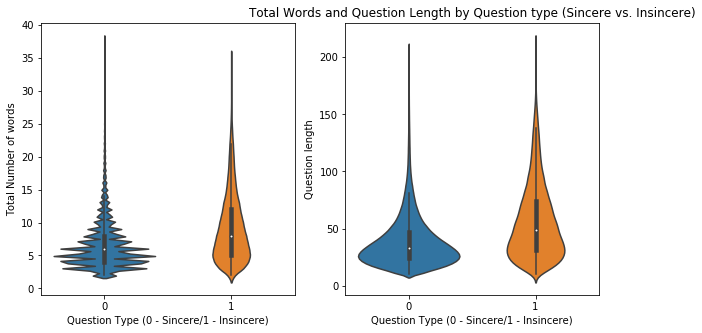

In [76]:
plt.rcParams["figure.figsize"] = (10,5)

plt.subplot(1,2,1)
sns.violinplot(x='target', y='total_words', data=df)

# Overlay a strip plot on the violin plot
#sns.stripplot(x='target', y='total_words', data=df, jitter=True,size=0.5)
plt.xlabel('Question Type (0 - Sincere/1 - Insincere)')
plt.ylabel('Total Number of words')

plt.subplot(1,2,2)
sns.violinplot(x='target', y='question_length', data=df)

# Overlay a strip plot on the violin plot
#sns.stripplot(x='target', y='question_length', data=df, jitter=True,size=0.5)
plt.xlabel('Question Type (0 - Sincere/1 - Insincere)')
plt.ylabel('Question length')

plt.title('Total Words and Question Length by Question type (Sincere vs. Insincere)')
plt.show()

**Inference**:

We can see that the insincere questions have more number of words as well as characters/ question length compared to sincere questions. So this might be a useful feature in our model.

### Joint plot to determine the correlation between the numeric feature columns -  Total words vs question length

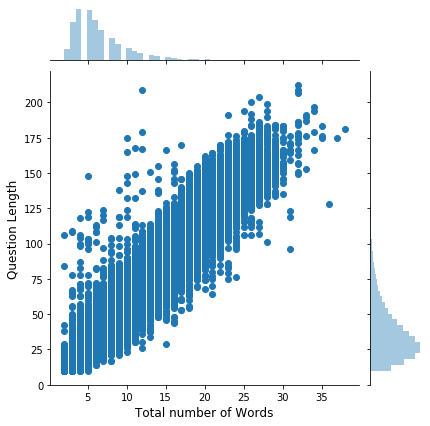

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)

h = sns.jointplot(x='total_words',y='question_length',data=df)
h.set_axis_labels('Total number of Words', 'Question Length', fontsize=12)

# Display the plot
plt.show()

In [ ]:
number_of_questions = df.groupby(['question_length', 'total_words']).size().reset_index(name="number_of_questions")

In [ ]:
number_of_questions.head(5)

,question_length,total_words,number_of_questions
0,10,2,5888
1,10,3,410
2,10,4,3
3,10,5,1
4,11,2,6231


In [ ]:
number_of_questions.columns

Index(['question_length', 'total_words', 'number_of_questions'], dtype='object')

In [ ]:
number_of_questions.dtypes

question_length        int64
total_words            int64
number_of_questions    int64
dtype: object

### 3D Scatter plot to see density of words, question length by Questions

Text(0.5, 0, 'Number. of questions')

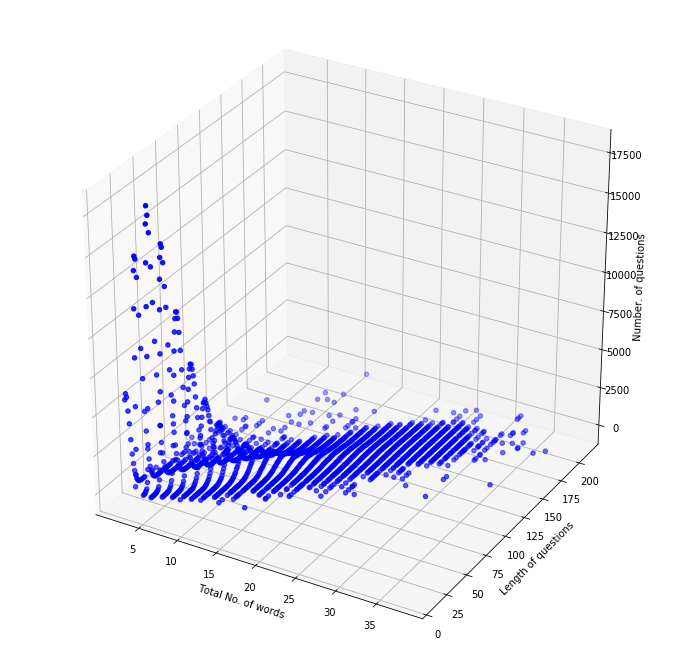

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 

plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()

x_val = number_of_questions['total_words']
y_val = number_of_questions['question_length']
z_val = number_of_questions['number_of_questions']

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_val, y_val, z_val, c = 'b', marker='o')
ax.set_xlabel('Total No. of words')
ax.set_ylabel('Length of questions')
ax.set_zlabel('Number. of questions')

### Find most frequently occurring words across the dataframe

In [ ]:
commonwords = pd.Series(' '.join(df['question_stemmed']).split()).value_counts()

In [ ]:
commonwords.head(10)

### Prepare a word cloud based on word frequencies using worldcloud package

In [ ]:
from wordcloud import WordCloud
def plot_wordcloud(text, title = None):
    wordcloud = WordCloud(background_color='white',
                    random_state = 42,
                    width=800, 
                    height=800).generate(str(text))
    
    #Plot
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud);
    plt.axis('off')
    plt.tight_layout(pad = 0) 
    plt.show()

In [ ]:
str(df['question_stemmed'])

In [ ]:
plot_wordcloud(df["question_stemmed"], title="Word Cloud of Questions")

In [53]:
# Seems like quotes are not removed from the dataset. Hence work on removing them
import string
df['question_stemmed'] = df['question_stemmed'].str.replace('[{}]'.format(string.punctuation), '')

In [ ]:
df_insincere = df[df['target']==1]
df_insincere.shape

In [ ]:
df_sincere = df[df['target']==0]
df_sincere.shape

              Frequency
Sincere_Word           
best              48666
get               46989
would             45040
people            30756
like              29516
good              29030
one               23061
india             22775
make              20282
think             17779
much              17023
many              16366
someone           15694
way               15679
work              15314
use               15071
know              14758
year              13865
us                13676
take              13170


Text(0.5, 1.0, 'Sincere questions_word frequency')

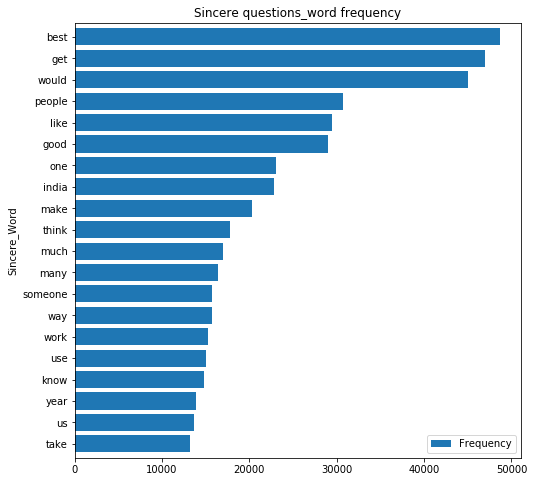

In [57]:
from collections import Counter
words_sincere = (df_sincere.question_stemmed
           .str.cat(sep=' ')
           .split())

# generate DF out of Counter
rslt_sincere = pd.DataFrame(Counter(words_sincere).most_common(20),
                    columns=['Sincere_Word', 'Frequency']).set_index('Sincere_Word').sort_values(by=['Frequency'], ascending=True)

print(rslt_sincere.sort_values(by=['Frequency'], ascending=False))

rslt_sincere.plot.barh(rot=0, figsize=(8,8), width=0.8)
plt.title('Sincere questions_word frequency')

                Frequency
Insincere_Word           
people               9132
women                4616
trump                4539
like                 4454
men                  3261
dont                 3251
would                3214
think                3074
white                2796
many                 2748
indian               2695
quora                2617
get                  2543
india                2540
muslims              2452
black                2403
us                   2366
americans            2086
sex                  2017
world                1882


Text(0.5, 1.0, 'Insincere questions_word frequency')

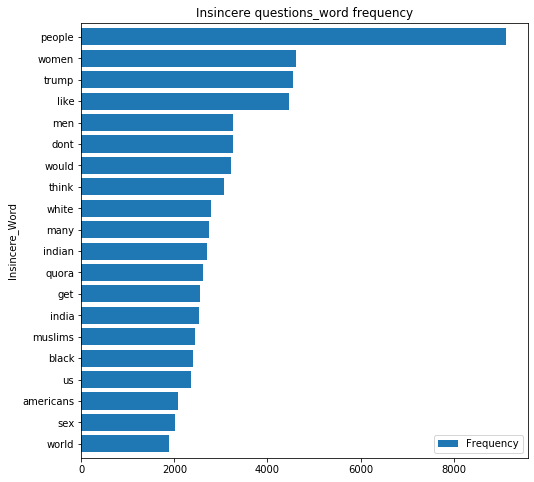

In [58]:
words_insincere = (df_insincere.question_stemmed
           .str.cat(sep=' ')
           .split())

# generate DF out of Counter
rslt_insincere = pd.DataFrame(Counter(words_insincere).most_common(20),
                    columns=['Insincere_Word', 'Frequency']).set_index('Insincere_Word').sort_values(by=['Frequency'], ascending=True)

print(rslt_insincere.sort_values(by=['Frequency'], ascending=False))
# plot
rslt_insincere.plot.barh(rot=0, figsize=(8,8), width=0.8)
plt.title('Insincere questions_word frequency')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                  Frequency
Word                       
donald trump           1036
white people            597
black people            555
united states           341
president trump         317
hillary clinton         306
year old                306
many people             301
trump supporters        294
even though             261
people think            248
chinese people          205
indian muslims          196
indian girls            187
can not                 186
north korea             183
white women             183
black men               180
white men               177
gun control             171


Text(0.5, 1.0, 'Insincere questions_Bigram word frequency')

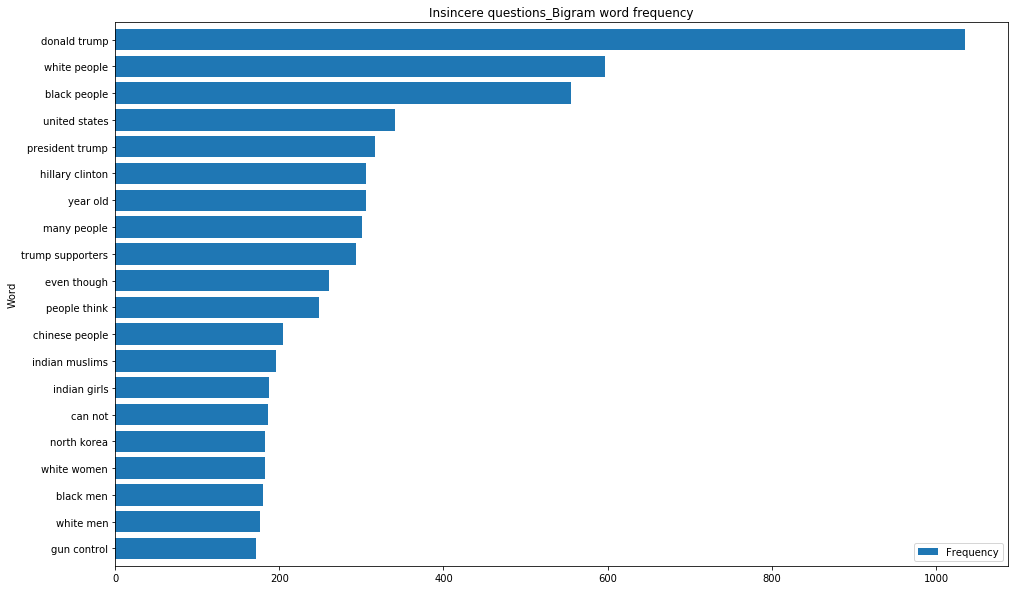

In [59]:
import nltk
from nltk.tokenize import word_tokenize

txt_insincere = (df_insincere.question_stemmed
           .str.cat(sep=' '))

words_insincere = nltk.tokenize.word_tokenize(txt_insincere)

bigrm = list(nltk.bigrams(words_insincere))
print (bigrm)

word_dist = nltk.FreqDist([' '.join(x) for x in bigrm])
rslt_insincere = pd.DataFrame(word_dist.most_common(20),
                columns=['Word', 'Frequency']).set_index('Word').sort_values(by=['Frequency'], ascending=True)
print(rslt_insincere.sort_values(by=['Frequency'], ascending=False))

rslt_insincere.plot.barh(rot=0, figsize=(16,10), width=0.8)
plt.title('Insincere questions_Bigram word frequency')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                  Frequency
Word                       
best way               5559
would happen           2776
year old               2676
high school            2159
whats best             2106
would win              1880
get rid                1854
feel like              1805
social media           1624
computer science       1624
get job                1607
united states          1583
many people            1531
would like             1499
even though            1493
donald trump           1453
long take              1447
years old              1362
dont know              1203
can not                1198


Text(0.5, 1.0, 'Sincere questions_Bigram word frequency')

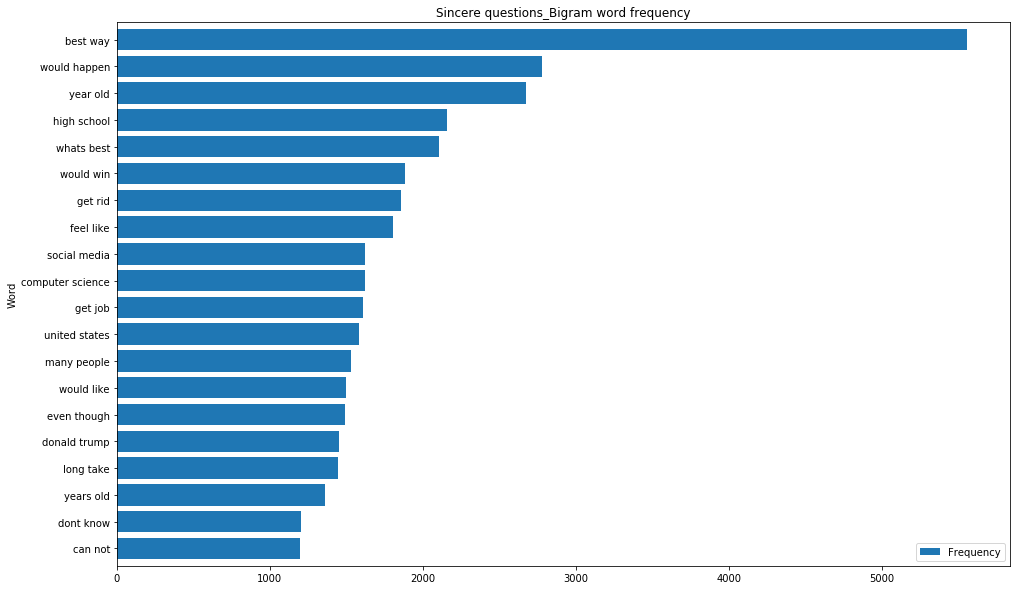

In [60]:
txt_sincere = (df_sincere.question_stemmed
           .str.cat(sep=' '))

words_sincere = nltk.tokenize.word_tokenize(txt_sincere)

bigrm = list(nltk.bigrams(words_sincere))
print (bigrm)

word_dist = nltk.FreqDist([' '.join(x) for x in bigrm])
rslt_sincere = pd.DataFrame(word_dist.most_common(20),
                columns=['Word', 'Frequency']).set_index('Word').sort_values(by=['Frequency'], ascending=True)
print(rslt_sincere.sort_values(by=['Frequency'], ascending=False))

rslt_sincere.plot.barh(rot=0, figsize=(16,10), width=0.8)
plt.title('Sincere questions_Bigram word frequency')